Import Libraries 

In [1]:
# #clean 
# import numpy as np
# import nltk 
# import re 
# from nltk.corpus import stopwords
# from collections import Counter

# nltk.download("popular")


# #A regular expression (or RE) specifies a set of strings that matches it; the functions in this module let you check
# #if a particular string matches a given regular expression
# #(or if a given regular expression matches a particular string, which comes down to the same thing).



import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [2]:
# !unzip '/content/shai-training-2022-a-level-2.zip'

In [3]:
df_train = pd.read_csv('../input/shai-training-2022-a-level-2/Train.csv')
df_test = pd.read_csv('../input/shai-training-2022-a-level-2/Test.csv')
df_valid = pd.read_csv('../input/shai-training-2022-a-level-2/Valid.csv')
df = pd.concat([df_train, df_valid]).sample(frac = 1).reset_index(drop=True)
df

,text,label
0,I enjoy watching Robert Forster. That was the ...,0
1,You better see this episode from the beginning...,1
2,"As far as cinematography goes, this film was p...",0
3,The opening sequence alone is worth the cost o...,1
4,Return to Cabin by the Lake is Perhaps one of ...,1
...,...,...
44995,"As an avid Gone With the Wind fan, I was disap...",0
44996,Where this movie is faithful to Burroughs' vis...,1
44997,At one time `Buddy Cop' movies ruled the box o...,1
44998,Critics love this movie. I personally found it...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    45000 non-null  object
 1   label   45000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 703.2+ KB


In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
label_0, label_1 = df['label'].value_counts()

print(f'Label 0: {(label_0/df.shape[0]):.4f}% \nLABEL 1: {(label_1/df.shape[0]):.4f}%')

Label 0: 0.5001% 
LABEL 1: 0.4999%


<AxesSubplot:xlabel='label', ylabel='count'>

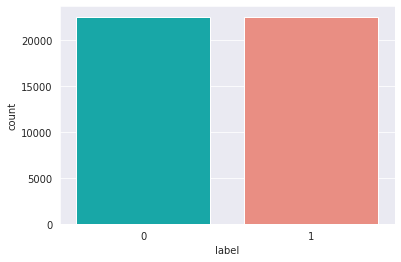

In [7]:
sns.countplot(x=df['label'], palette = ["c" , "Salmon"])

# Insights


No need to perform any data imputation or any balancing techniques

# Data Transformation

Using the package nltk (natural language tool kit), I utilize different methods to transform my text data into a cleaned one which can significantly help for my model creation.




In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [9]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /usr/share/nltk_data...


True

In [10]:
def clean_tokenize_stop(text):
    
    #Removes Unnecessary characters and only collects alphabets or numbers
    regexp = RegexpTokenizer('\w+')
    cleaned = regexp.tokenize(text.lower()) #transform text into lower cases
        
    #Removing stopwords or common words which dont add any meaning
    stopwords = nltk.corpus.stopwords.words("english")
    stopwords.extend(['movies', 'movie', 'im', 'film', 'br']) #extending my stopwords
    cleaned2 = [item for item in cleaned if item not in stopwords]
    
    #Performing lemmatization(reverting a word to its base form) which is better than stemming 
    wordnet_lem = WordNetLemmatizer()
    cleaned3 = [wordnet_lem.lemmatize(item) for item in cleaned2] # running runs
    
    cleaned4 = ' '.join([word for word in cleaned3]) 
                
    return cleaned4

In [11]:
df['text'] = df['text'].apply(clean_tokenize_stop)

In [12]:
df

,text,label
0,enjoy watching robert forster main reason rent...,0
1,better see episode beginning start watch later...,1
2,far cinematography go pretty good mid 50 time ...,0
3,opening sequence alone worth cost admission ch...,1
4,return cabin lake perhaps one sequel live orig...,1
...,...,...
44995,avid gone wind fan disappointed watch original...,0
44996,faithful burroughs vision excellent departs bu...,1
44997,one time buddy cop ruled box office seemed eve...,1
44998,critic love personally found senseless tastele...,0


# Words Frequency Distribution

Im going to plot the frequency or the number of times the word appeared in the corpus.



In [13]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

allwords = ' '.join([word for word in df['text']]) # ['feel', 'family']
words = word_tokenize(allwords)
fd = FreqDist(words)

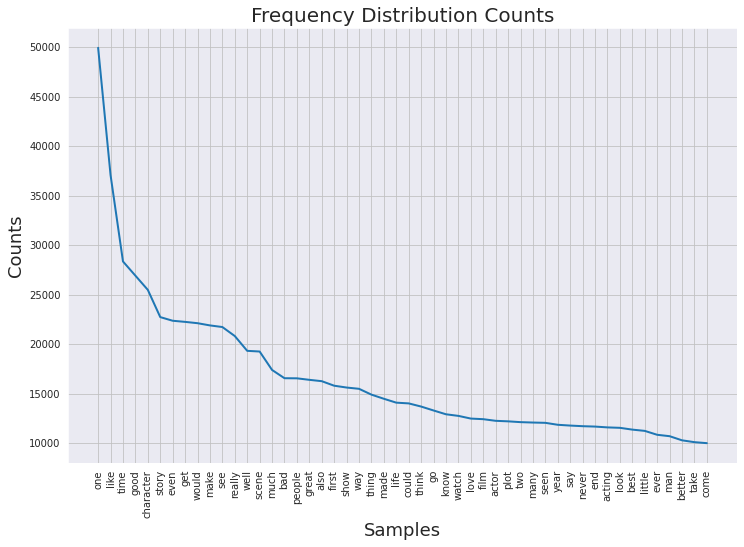

<AxesSubplot:title={'center':'Frequency Distribution Counts'}, xlabel='Samples', ylabel='Counts'>

In [14]:
# Plotting the frequency counts
plt.figure(figsize=(12,8))
plt.title('Frequency Distribution Counts', fontdict={'size': 20})
plt.xlabel('Words', fontdict={'size': 18})
plt.ylabel('Counts', fontdict={'size': 18})
fd.plot(50, cumulative =False)

(-0.5, 799.5, 499.5, -0.5)

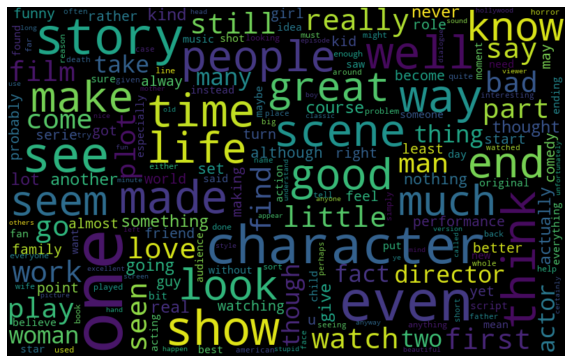

In [15]:
#Plotting some word Cloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, 
                     height=500, 
                     random_state=2, 
                     max_font_size=100).generate(allwords)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Model Creation

Splitting of data part where i will train my Sentiment Analysis model predictor using Tf-idf Vectorizer and utilizing 5 machine learning techniques with the use of pipeline to make my code clean.



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC


In [17]:
x = df['text']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #test size is 30%

In [18]:
# Pipeline creation 

pipe_NB = Pipeline([
    ('cv1', TfidfVectorizer()),
    ('NB', MultinomialNB())
])

pipe_LR = Pipeline([
    ('cv2', TfidfVectorizer()),
    ('LR', LogisticRegression())
])

pipe_GB = Pipeline([
    ('cv3', TfidfVectorizer()),
    ('GB', GradientBoostingClassifier())
])

pipe_RF = Pipeline([
    ('cv4', TfidfVectorizer()),
    ('RF', RandomForestClassifier())
])

pipe_KNN = Pipeline([
    ('cv5', TfidfVectorizer()),
    ('DT', KNeighborsClassifier())
])

# pipe_LA = Pipeline([
#     ('cv6', TfidfVectorizer()),
#     ('LA', LinearDiscriminantAnalysis())
# ])

pipe_LS = Pipeline([
    ('cv6', TfidfVectorizer()),
    ('LS', LinearSVC())
])

# pipe_HC = Pipeline([
#     ('cv7', TfidfVectorizer()),
#     ('HC', HistGradientBoostingClassifier())
# ])

pipelines = [pipe_NB, pipe_LR, pipe_GB, pipe_RF, pipe_KNN ,pipe_LS ]
pipelines

[Pipeline(steps=[('cv1', TfidfVectorizer()), ('NB', MultinomialNB())]),
 Pipeline(steps=[('cv2', TfidfVectorizer()), ('LR', LogisticRegression())]),
 Pipeline(steps=[('cv3', TfidfVectorizer()),
                 ('GB', GradientBoostingClassifier())]),
 Pipeline(steps=[('cv4', TfidfVectorizer()), ('RF', RandomForestClassifier())]),
 Pipeline(steps=[('cv5', TfidfVectorizer()), ('DT', KNeighborsClassifier())]),
 Pipeline(steps=[('cv6', TfidfVectorizer()), ('LS', LinearSVC())])]

# Model Evaluation Part

I used accuracy as a metric because the dataset is balance.

100%|██████████| 6/6 [07:10<00:00, 71.75s/it]


Text(0, 0.5, 'Accuracy (percentage)')

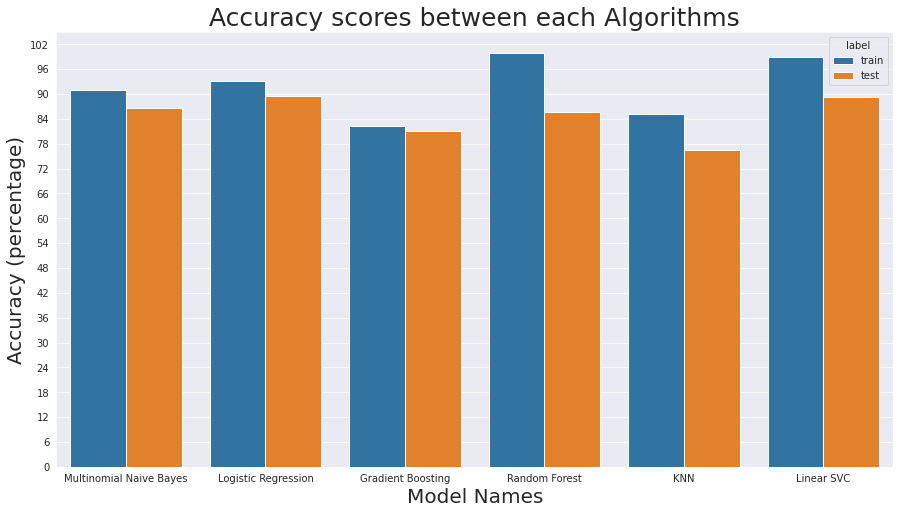

In [19]:
#Data Fitting and Testing
pipe_names = ['Multinomial Naive Bayes', 'Logistic Regression', 'Gradient Boosting', 'Random Forest', 'KNN',
'Linear SVC']
train_acc = []
val_acc = []

for pipe in tqdm(pipelines):
    pipe.fit(x_train, y_train)
    train_acc.append(pipe.score(x_train, y_train)*100)
    val_acc.append(pipe.score(x_test, y_test)*100)
    
data_acc = pd.DataFrame({
    'names': pipe_names + pipe_names, # [naive,logistic, ...., navive]
    'score': train_acc + val_acc, # [98,97,...,87,88]
    'label' : (['train']*6) + (['test']*6) # [train, train, train, ..., test,test] 
})

plt.figure(figsize=(15,8))
plt.title('Accuracy scores between each Algorithms', fontdict={'fontsize':25})
sns.barplot(data= data_acc, x='names', y='score', hue='label')
plt.xlabel('Model Names', fontdict={'fontsize':20})
plt.yticks(range(0,105,6))
plt.ylabel('Accuracy (percentage)', fontdict={'fontsize':20})

# Optimization

### Based from the accuracy above, The top 3 models are Naive Bayes, Logistic Regression and Random Forest

These three models will undergo hyper parameter tuning to see which is the best model out of all three.



In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score


# Create a pipeline
param_range = [5, 10, 15]
param_range_fl = [0.1, 1, 3]
ngram_range = [(1,3), (2,2)]

pipe = Pipeline([('Vectorizer', TfidfVectorizer())
                ,("classifier", RandomForestClassifier())])

grid_param = [
                {"Vectorizer": [TfidfVectorizer()],
                 "Vectorizer__ngram_range": ngram_range,
                "classifier": [LinearSVC()]
                 },
                {
                "Vectorizer": [TfidfVectorizer()],
                 "Vectorizer__ngram_range": ngram_range,
                "classifier": [LogisticRegression()],
                 "classifier__penalty": ['l1', 'l2'],
                 "classifier__C": param_range_fl
                 },
                {
                 "Vectorizer": [TfidfVectorizer()],
                 "Vectorizer__ngram_range": ngram_range,
                "classifier": [RandomForestClassifier()],
                 "classifier__max_depth": param_range,
                 "classifier__min_samples_split": param_range
                }]

gridsearch = GridSearchCV(pipe, grid_param, cv=15, n_jobs=-1, scoring='accuracy') 
best_model = gridsearch.fit(x_train,y_train)

In [21]:
cols = ['mean_fit_time', 'param_classifier', 'mean_test_score', 'rank_test_score']
pd.DataFrame(best_model.cv_results_)[cols].sort_values(by='rank_test_score').head()

,mean_fit_time,param_classifier,mean_test_score,rank_test_score
0,83.373055,LinearSVC(),0.896794,1
7,166.225850,LogisticRegression(),0.888159,2
5,187.251264,LogisticRegression(),0.879048,3
1,31.768384,LinearSVC(),0.866540,4
13,77.680459,LogisticRegression(),0.859651,5


In [22]:
best_model.best_params_

{'Vectorizer': TfidfVectorizer(ngram_range=(1, 3)),
 'Vectorizer__ngram_range': (1, 3),
 'classifier': LinearSVC()}

In [23]:
best_model = Pipeline([
    ('cv1', TfidfVectorizer(ngram_range=(1,3))),
    ('LS', LinearSVC())
])
best_model.fit(x_train, y_train)

Pipeline(steps=[('cv1', TfidfVectorizer(ngram_range=(1, 3))),
                ('LS', LinearSVC())])

# Results

In [24]:
df_check = pd.read_csv('../input/shai-training-2022-a-level-2/Test.csv')


In [25]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5000 non-null   int64  
 1   text    5000 non-null   object 
 2   label   0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 117.3+ KB


In [26]:
x_test_t = df_check['text'].apply(clean_tokenize_stop)


In [27]:
# df_check = pd.read_csv('../input/shai-training-2022-a-level-2/Test.csv')
# x_test_t = df_check['text'].apply(clean_tokenize_stop)
y_test_t = df_check['label']

In [28]:
y_pred =best_model.predict(x_test_t)

In [29]:
submission_file = pd.read_csv("../input/shai-training-2022-a-level-2/sample_submission.csv")
submission_file['label'] = y_pred.round().astype(int)
submission_file.to_csv('submission.csv', index=False)
submission_file.head()

,id,label
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
